In [1]:
import numpy as np
import pickle, os, math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
from scipy.spatial.distance import jensenshannon

In [2]:
root_folder = '../../Data/Performance_Metrics'

In [3]:
cov_folders = ['lpWGS_0.1X_1Mb', 'lpWGS_0.5X', 'lpWGS_1X', 'lpWGS_2X', 'deepWGS_10X', 'deepWGS_original']
methods = ['Original', 'Proposed', 'Griffin', 'GCparagon']
methods_marker_dic = {'Original': 'D', 'Proposed': 'o', 'Griffin': 's', 'GCparagon': '^'}
methods_color_dic = {'Original': 'm', 'Proposed': 'b', 'Griffin': 'g', 'GCparagon': 'r'}
cohorts = ['BRCA_gis', 'CRC_gis', 'healthy_c2i', 'healthy_invitro']

X = np.log10(np.array([0.1, 0.5, 1, 2, 10, 30])).tolist()
X_labels = ['0.1X', '0.5X', '1X', '2X', '10X', '>30X']

In [4]:
all_sample_list = []
main_folder = f'{root_folder}/Samples/'
for cohort in cohorts:
    files = os.listdir(f'{main_folder}/{cohort}/')
    for file_ in files:
        all_sample_list.append(file_[:-4])

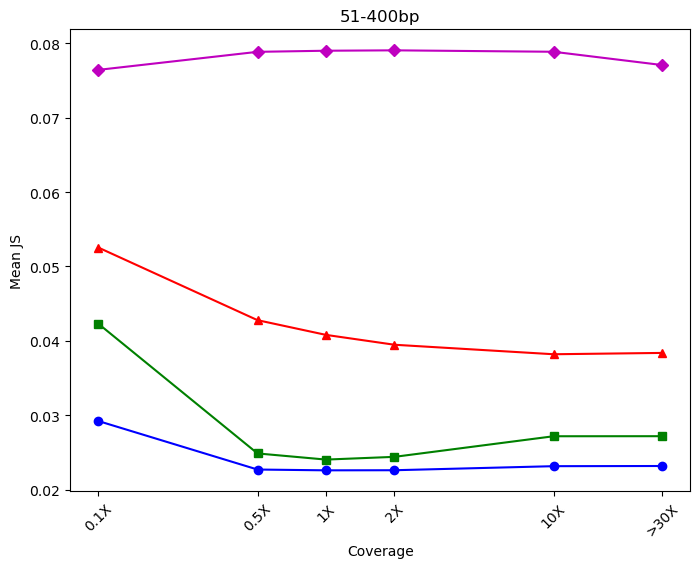

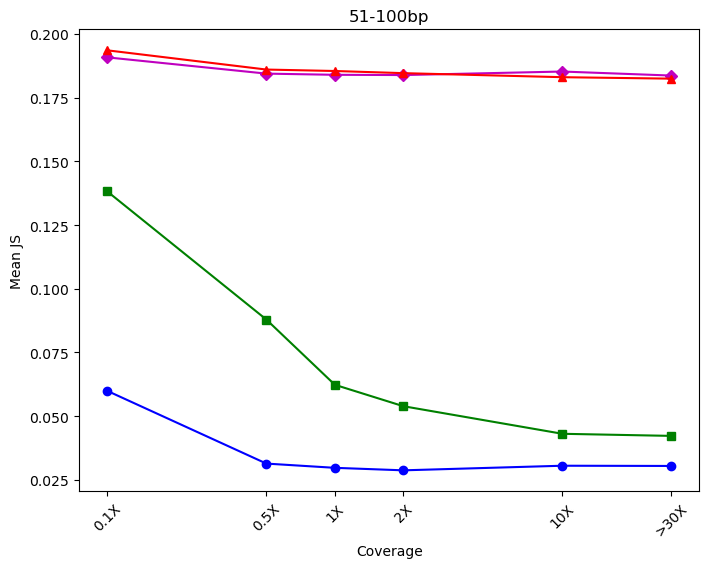

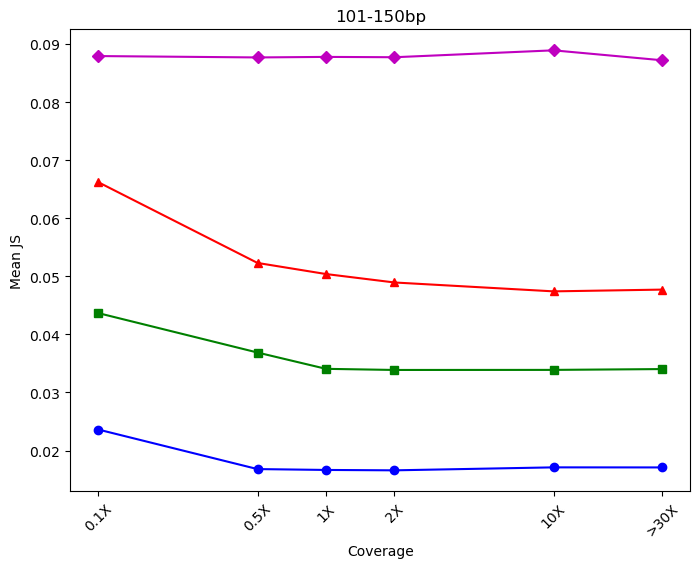

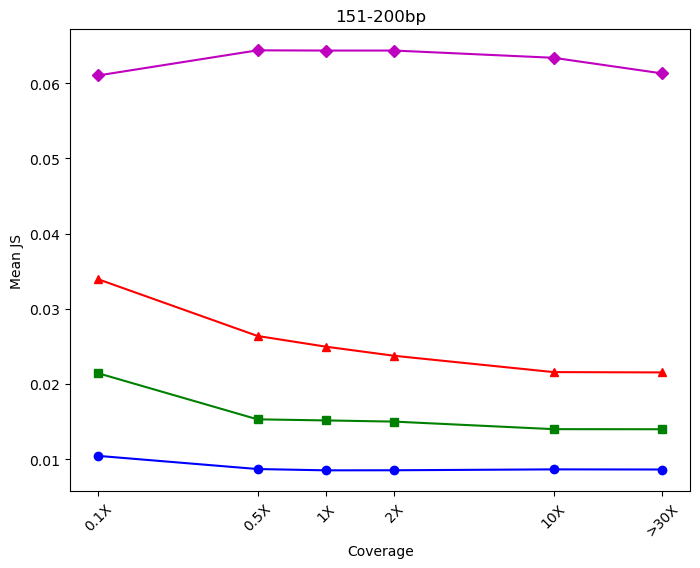

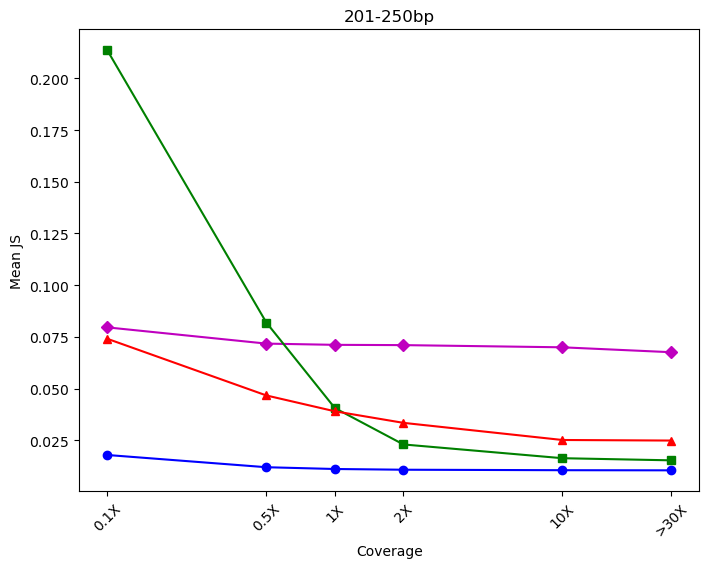

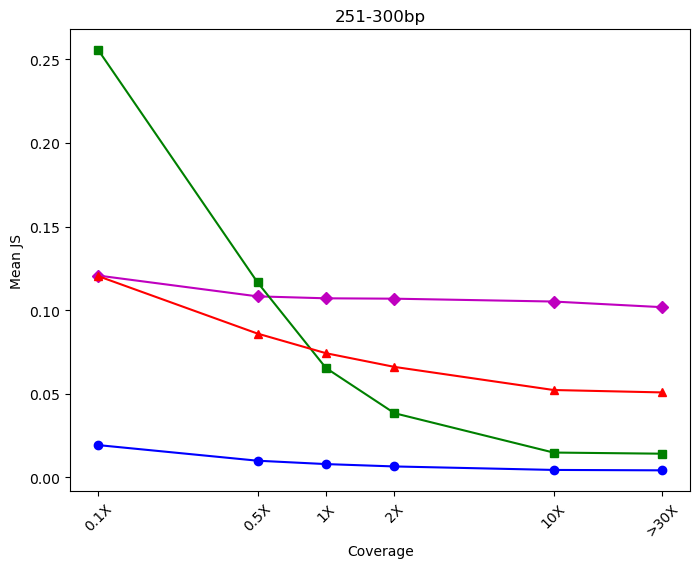

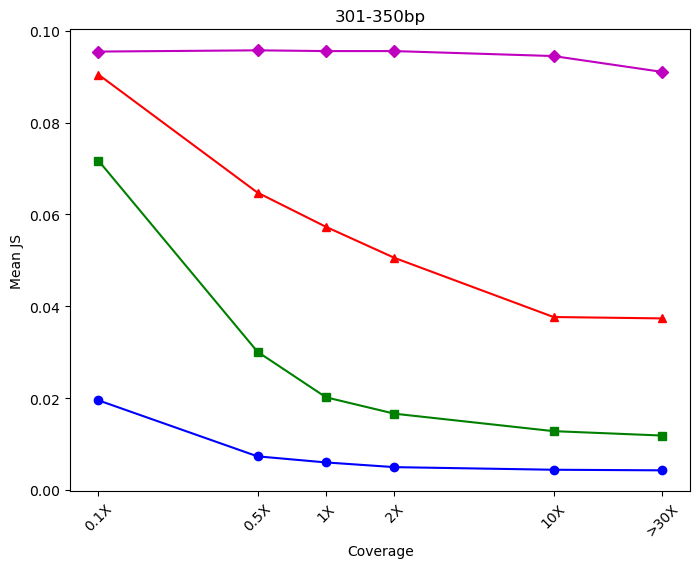

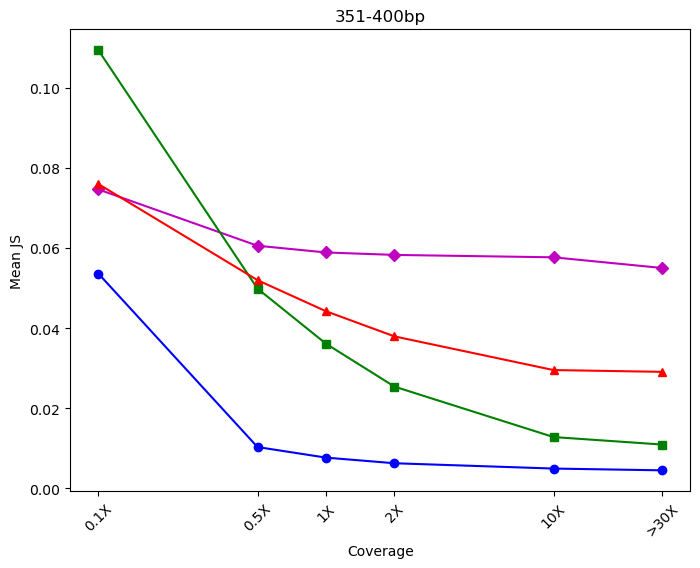

In [21]:
len_groups = [[51, 400], [51, 100], [101, 150], [151, 200], [201, 250], [251, 300], [301, 350], [351, 400]]

def load_JS(dic_path, len_group_str):
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    JS_list = []
    for sample in all_sample_list:
        key = f'{sample}: {len_group_str}'
        JS_list.append(dic[key])
    return np.mean(JS_list)

def plot_method_JS(METHOD, len_group_index):
    Y = []
    len_start, len_end = len_groups[len_group_index][0], len_groups[len_group_index][1]
    len_group_str = f'{len_start}-{len_end}'
    for cov_folder in cov_folders:
        dic_path = f'{root_folder}/{cov_folder}/{METHOD}/reference_JS_divergence.pkl'
        Y.append( load_JS(dic_path, len_group_str) )
    color = methods_color_dic[METHOD]
    marker = methods_marker_dic[METHOD]
    plt.plot(X, Y, marker=marker, color=color, label=METHOD)

def plot_len_group_JS(len_group_index):
    plt.figure(figsize=(8, 6))
    for method in methods:
        plot_method_JS(method, len_group_index)
    plt.xticks(X, X_labels, rotation=45)
    plt.xlabel('Coverage')
    plt.ylabel('Mean JS')
    plt.title(f'{len_groups[len_group_index][0]}-{len_groups[len_group_index][1]}bp')
    # plt.legend()
    len_start, len_end = len_groups[len_group_index][0], len_groups[len_group_index][1]
    plt.savefig(f'subfigures/{len_start}__{len_end}bp.png', dpi=300)

for i in range(len(len_groups)):
    plot_len_group_JS(i)

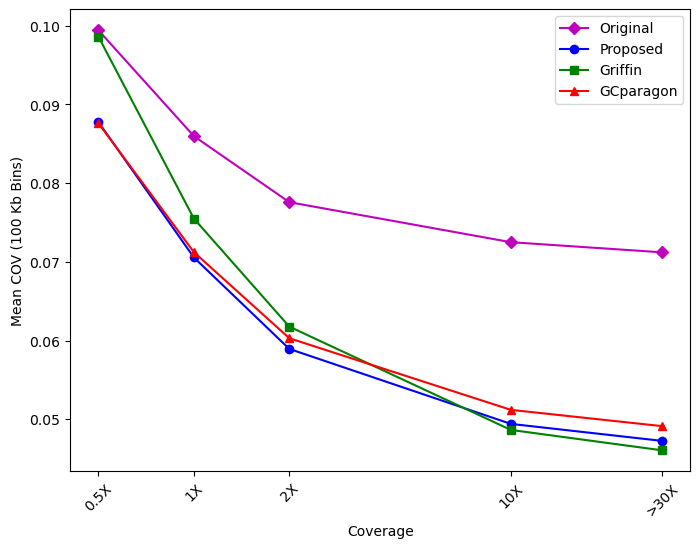

In [6]:
def load_CV(dic_path, cov_folder):
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    CV_list = []
    for sample in all_sample_list:
        if 'deep' in cov_folder:
            CV_list.append( np.mean(dic[sample][0]) )
        else:
            CV_list.append( np.mean(dic[sample]) )
    return np.mean(CV_list)

def plot_method_CV(METHOD):
    Y = []
    for cov_folder in cov_folders[1:]:
        dic_path = f'{root_folder}/{cov_folder}/{METHOD}/CV.pkl'
        Y.append( load_CV(dic_path, cov_folder) )
    color = methods_color_dic[METHOD]
    marker = methods_marker_dic[METHOD]
    plt.plot(X[1:], Y, marker=marker, color=color, label=METHOD)

plt.figure(figsize=(8, 6))
for method in methods:
    plot_method_CV(method)
plt.xticks(X[1:], X_labels[1:], rotation=45)
plt.xlabel('Coverage')
plt.ylabel('Mean COV (100 Kb Bins)')
plt.legend()
plt.savefig(f'subfigures/COV_summary.png', dpi=300)

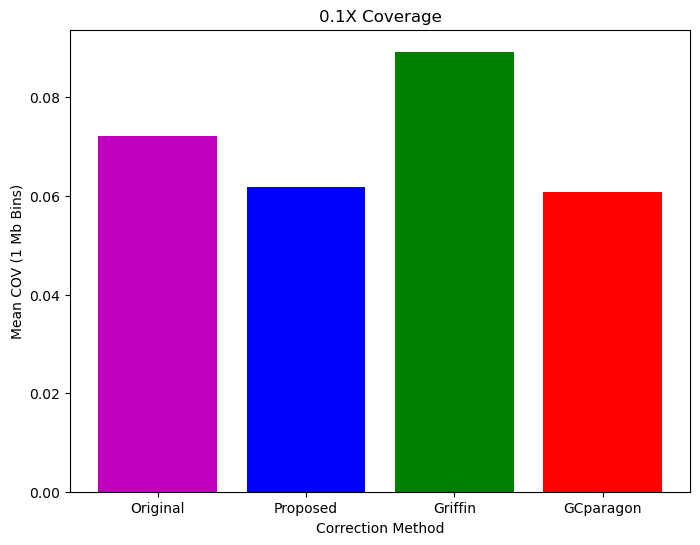

In [7]:
def load_CV(dic_path):
    dic = {}
    with open(dic_path, 'rb') as f:
        dic = pickle.load(f)
    CV_list = []
    for sample in all_sample_list:
        CV_list.append( np.mean(dic[sample]) )
    return np.mean(CV_list)

CVs, X_values, colors = [], [], []
for method in methods:
    # f'{root_folder}/{cov_folder}/{METHOD}/CV.pkl'
    dic_path = f'{root_folder}/{cov_folders[0]}/{method}/CV.pkl'
    CVs.append( load_CV(dic_path) )
    X_values.append( method )
    colors.append( methods_color_dic[method] )
    
plt.figure(figsize=(8, 6))
plt.bar(X_values, CVs, color=colors)
plt.xlabel('Correction Method')
plt.ylabel('Mean COV (1 Mb Bins)')
plt.title('0.1X Coverage')

# Display the plot
plt.savefig(f'subfigures/COV_summary_0.1X.png', dpi=300)

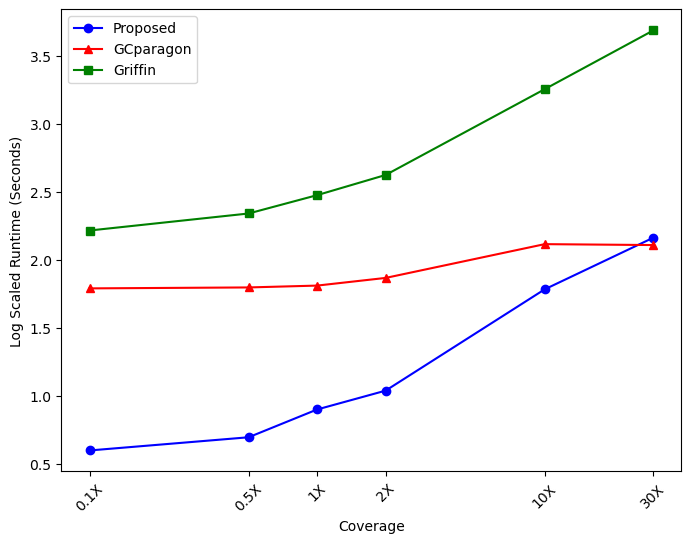

In [7]:
X = np.log10(np.array([0.1, 0.5, 1, 2, 10, 30])).tolist()
X_labels = ['0.1X', '0.5X', '1X', '2X', '10X', '30X']

plt.figure(figsize=(8, 6))
proposed_Y = np.log10( np.array([4, 5, 8, 11, 61, 146]) ).tolist()
plt.plot(X, proposed_Y, marker=methods_marker_dic['Proposed'], color=methods_color_dic['Proposed'], label='Proposed')
GCparagon_Y = np.log10( np.array([62, 63, 65, 74, 131, 129]) ).tolist() 
plt.plot(X, GCparagon_Y, marker=methods_marker_dic['GCparagon'], color=methods_color_dic['GCparagon'], label='GCparagon')
Griffin_Y = np.log10( np.array([165, 220, 300, 422, 1800, 4860]) ).tolist() 
plt.plot(X, Griffin_Y, marker=methods_marker_dic['Griffin'], color=methods_color_dic['Griffin'], label='Griffin')

plt.xticks(X, X_labels, rotation=45)
plt.xlabel('Coverage')
plt.ylabel('Log Scaled Runtime (Seconds)')
plt.legend()
plt.savefig(f'subfigures/runtime.png', dpi=300)
# plt.show()

In [6]:
!ls

Code.ipynb


..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
................................................................................

C:\Users\rahmancr\AppData\Local\Temp\ipykernel_3592\536318614.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 4))


..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
................................................................................

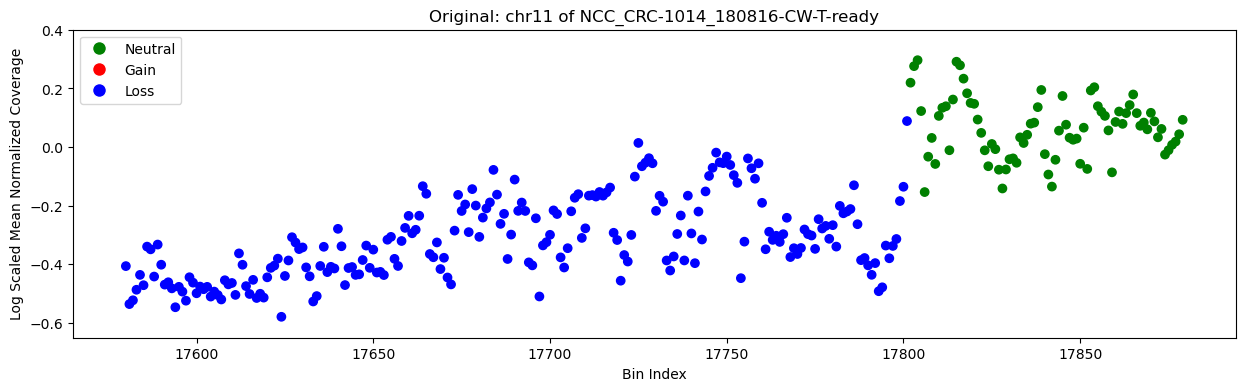

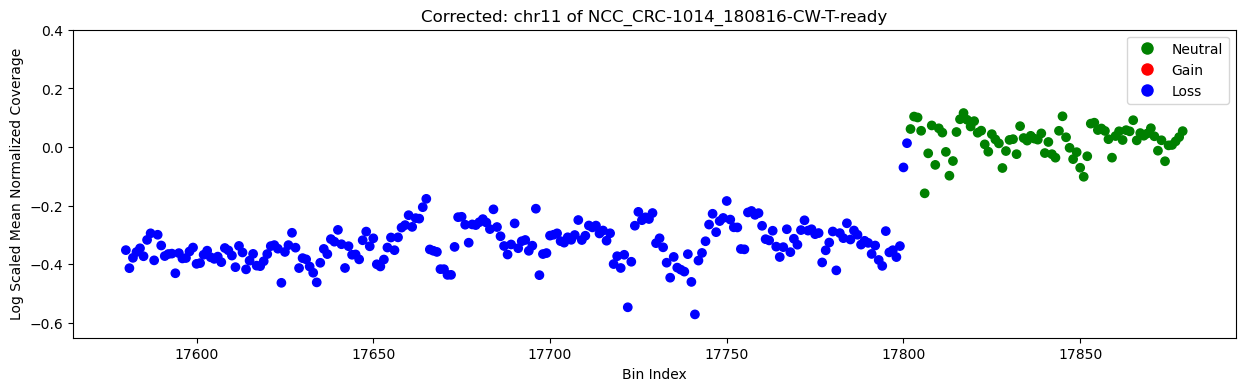

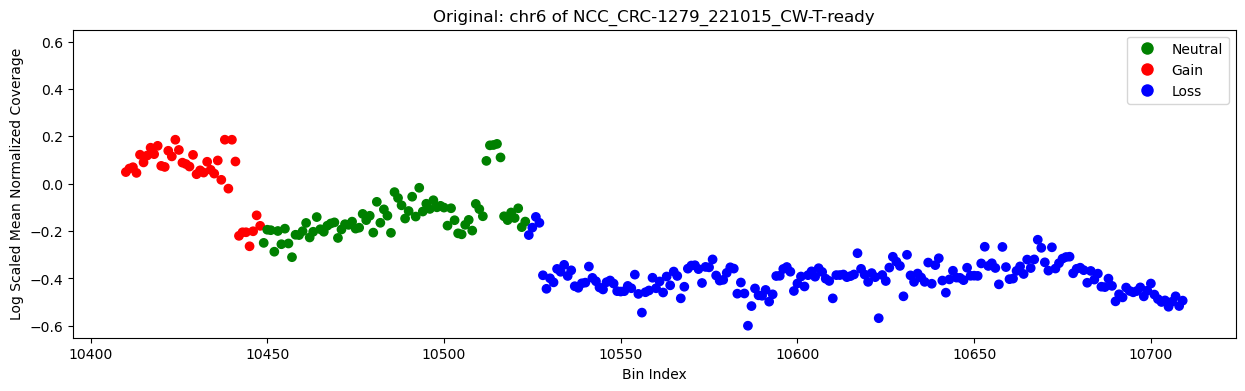

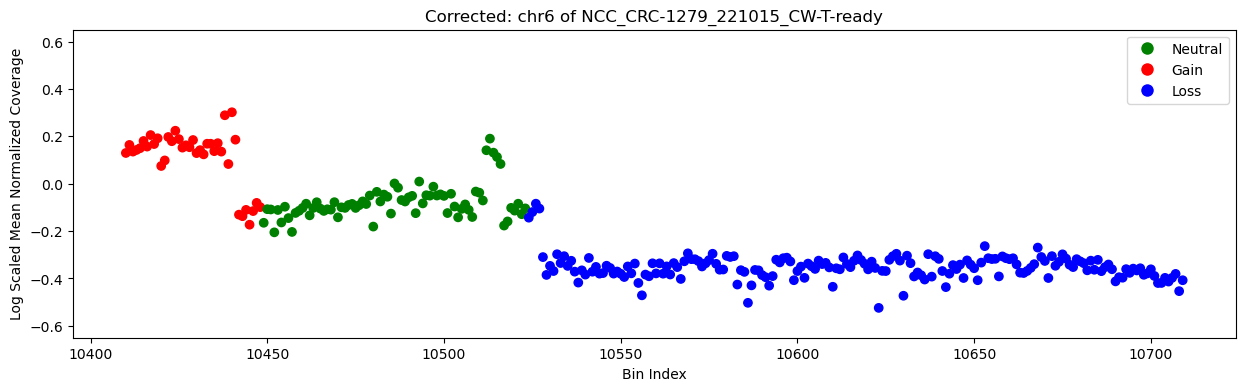

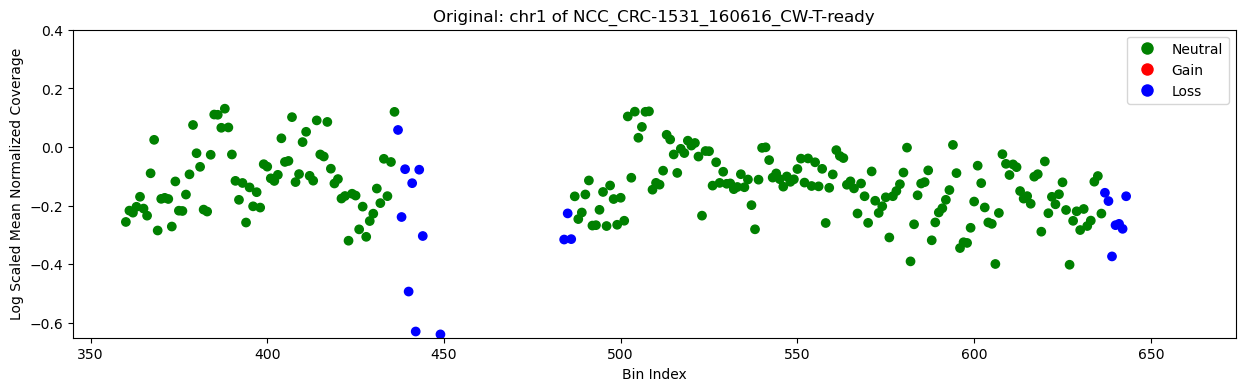

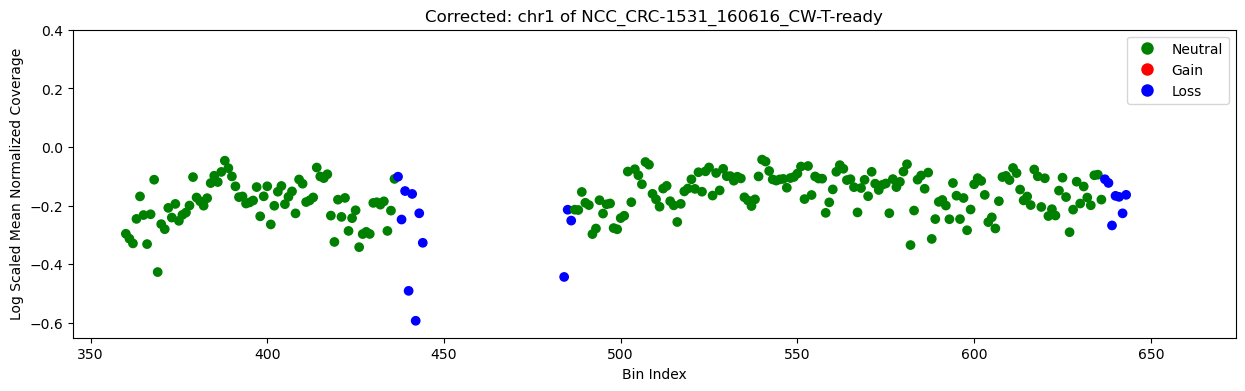

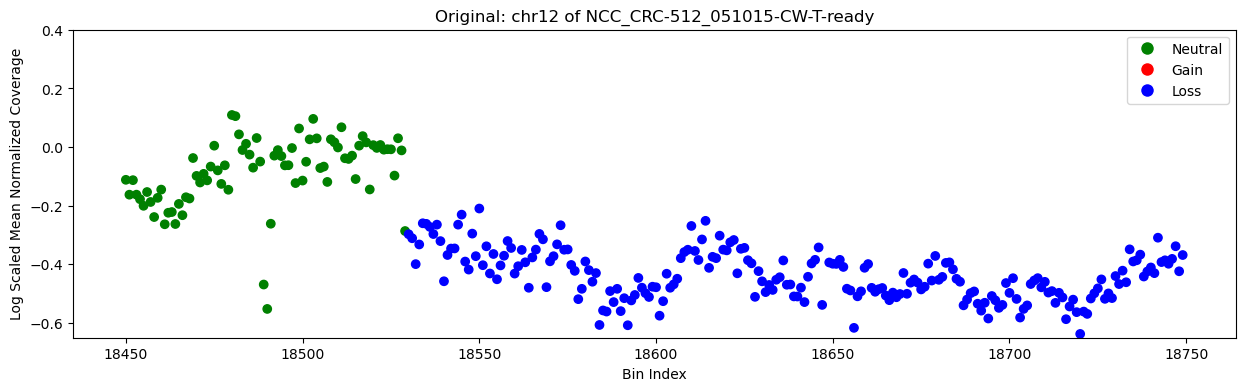

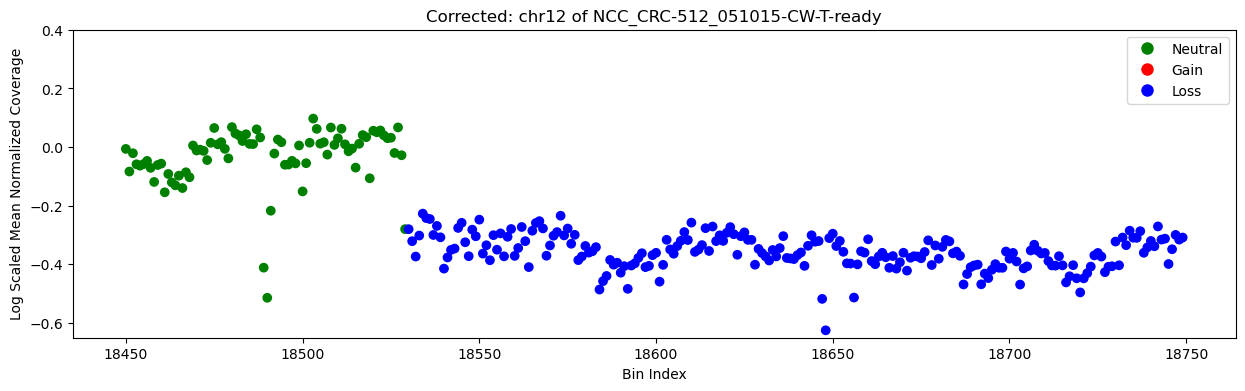

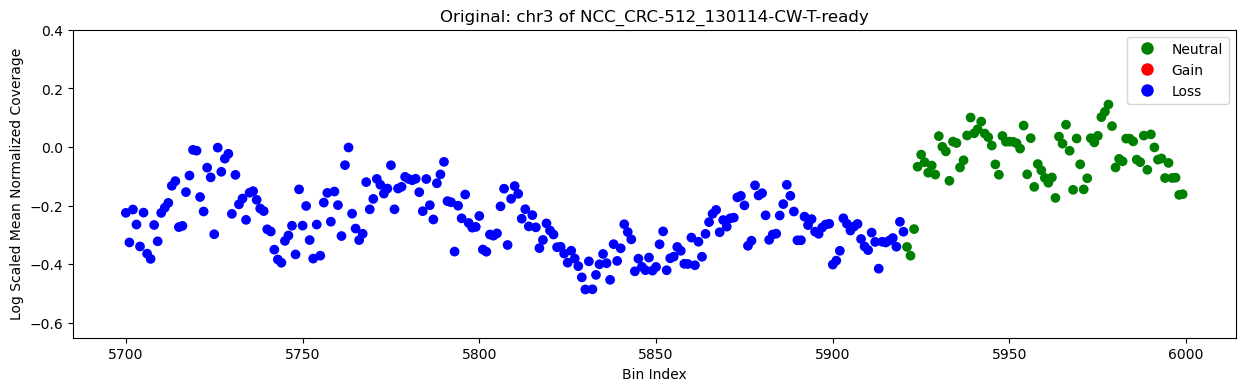

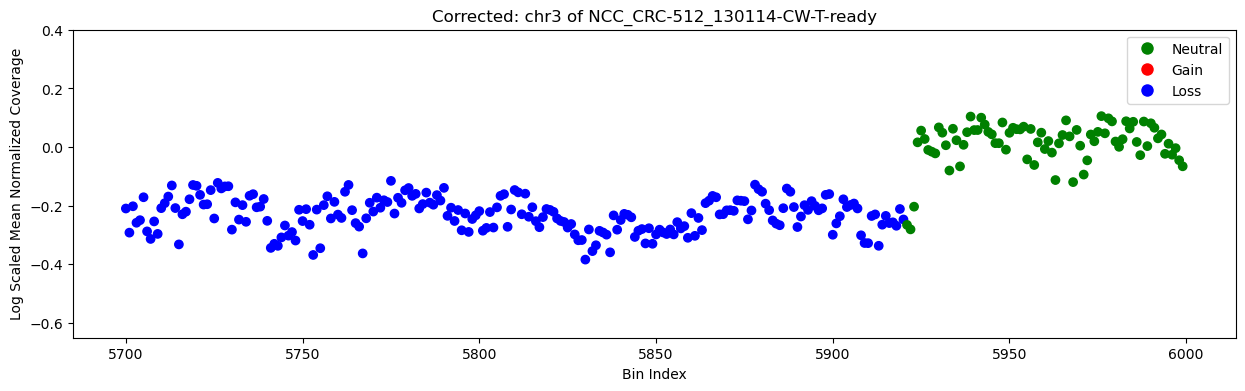

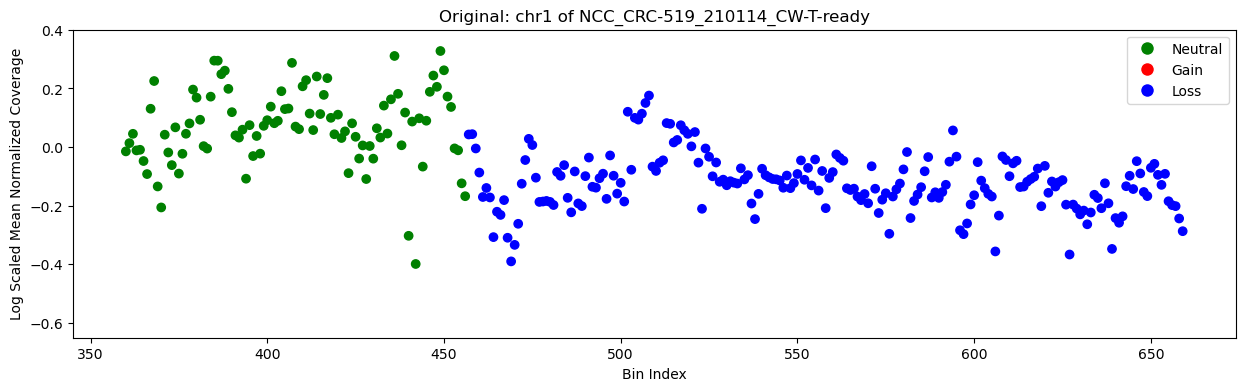

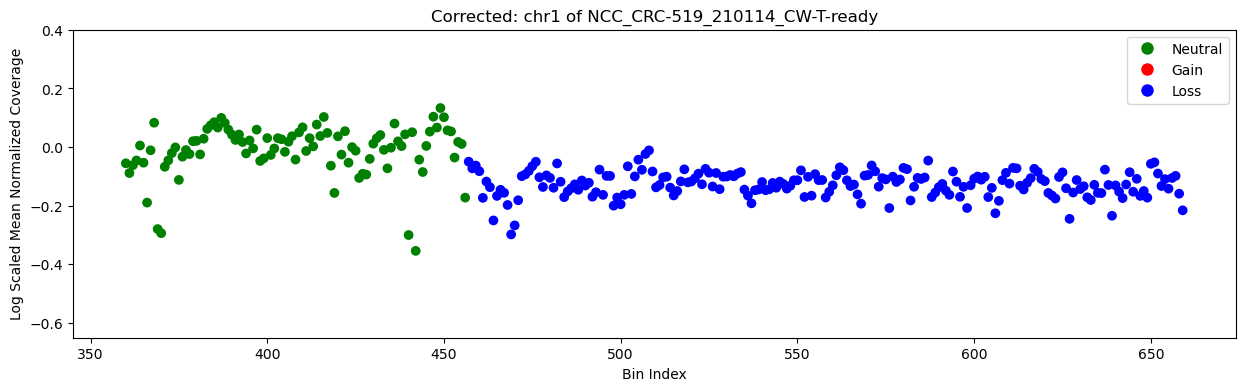

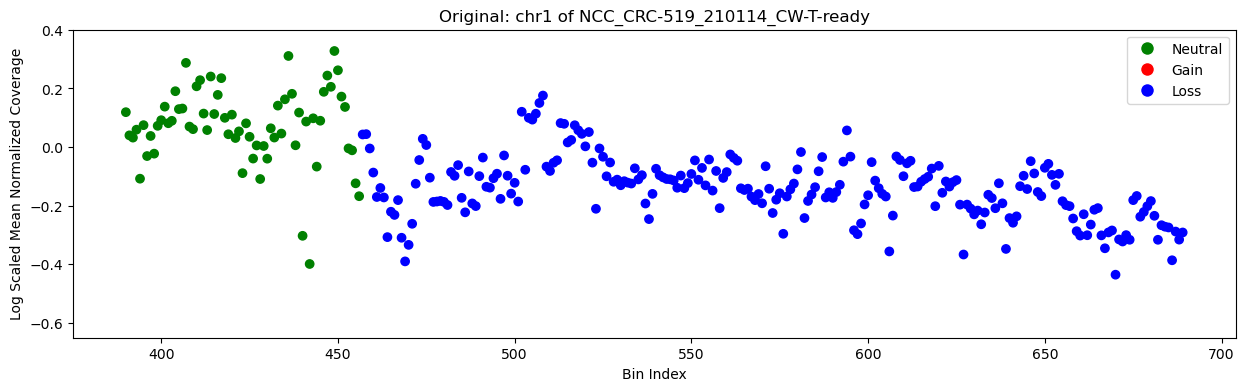

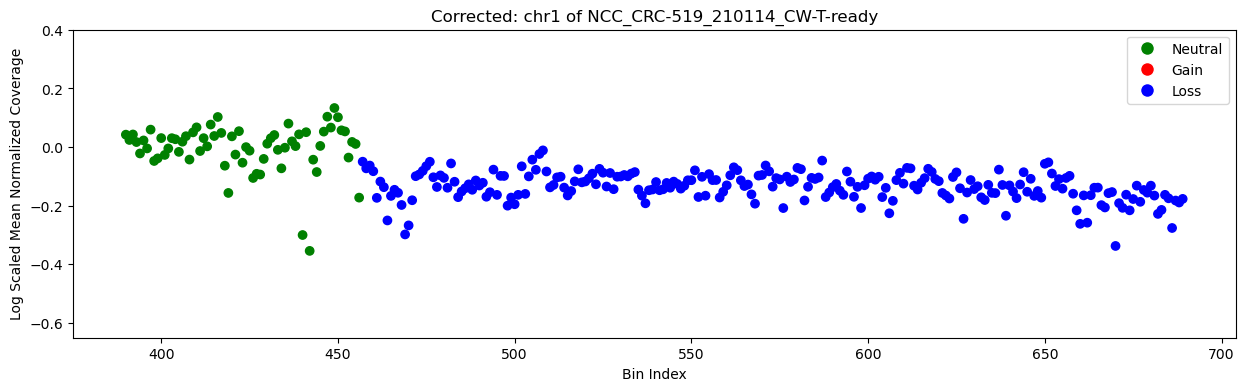

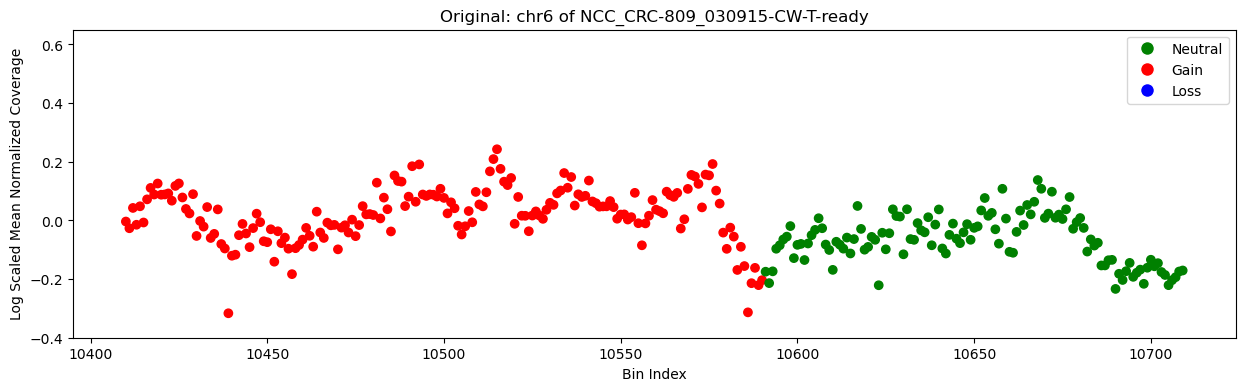

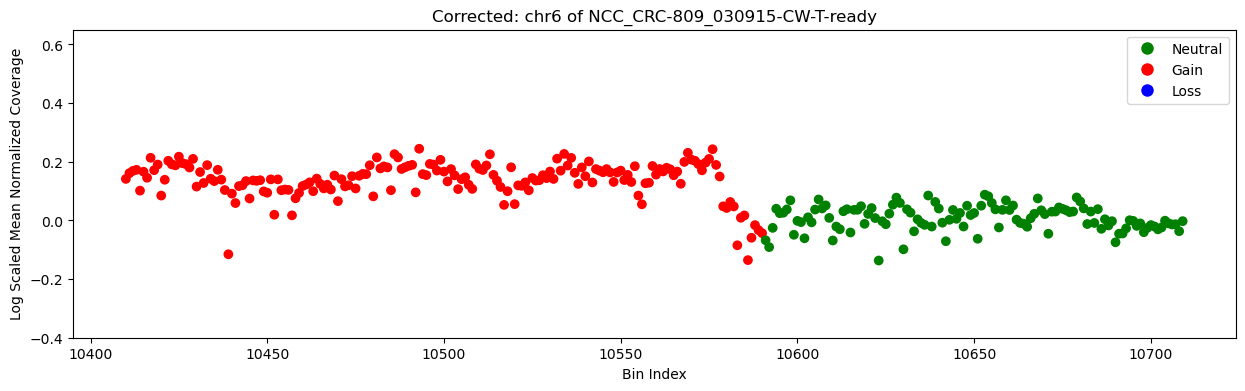

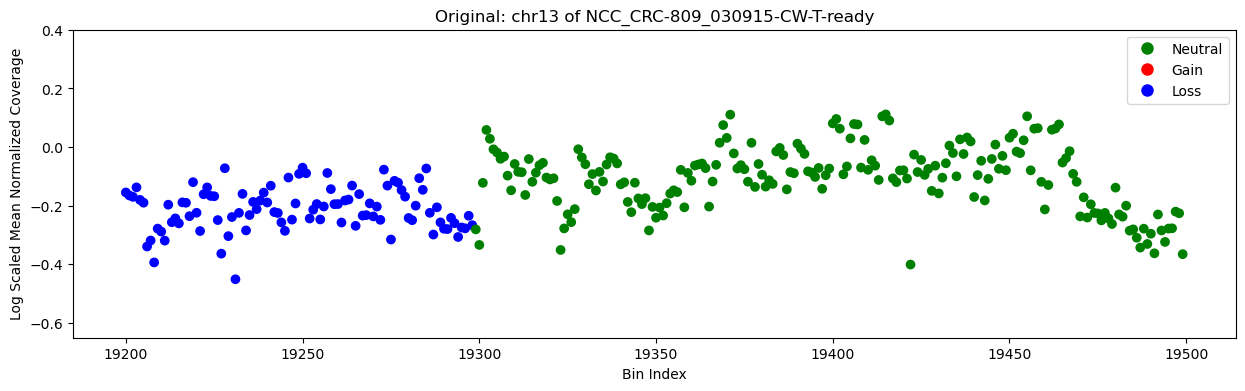

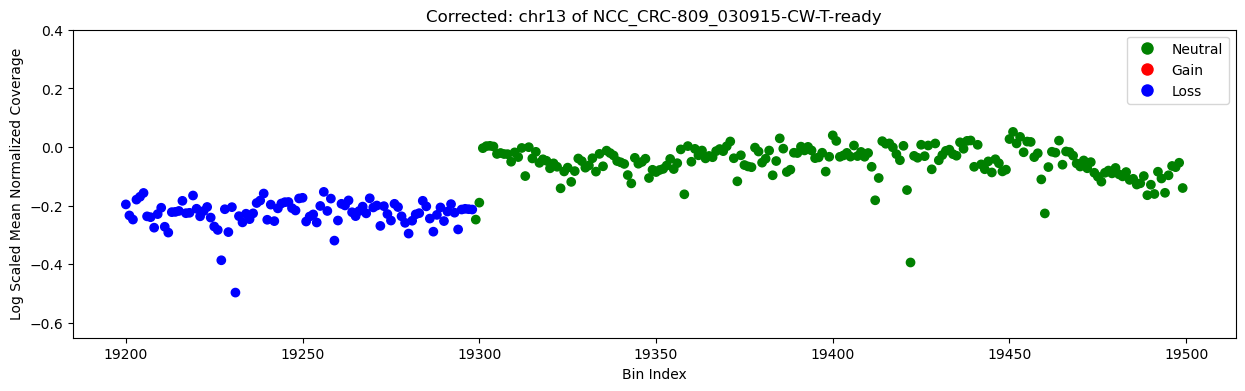

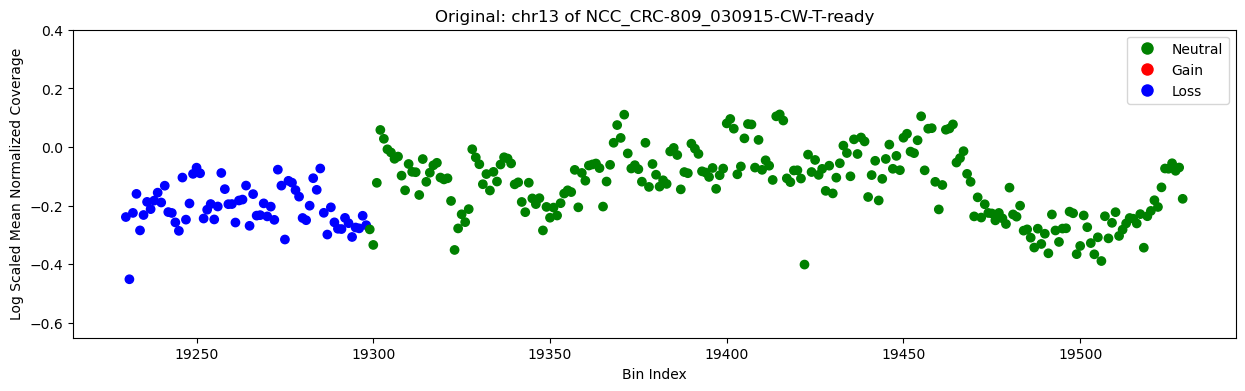

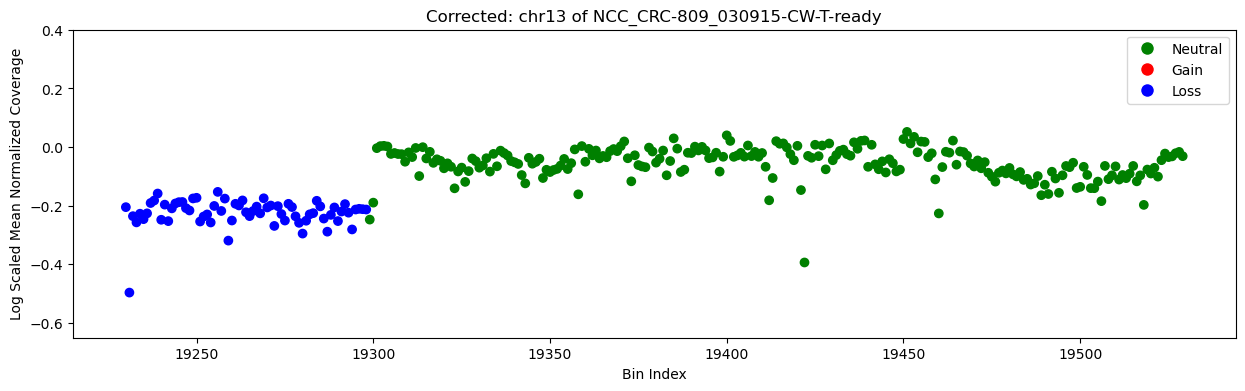

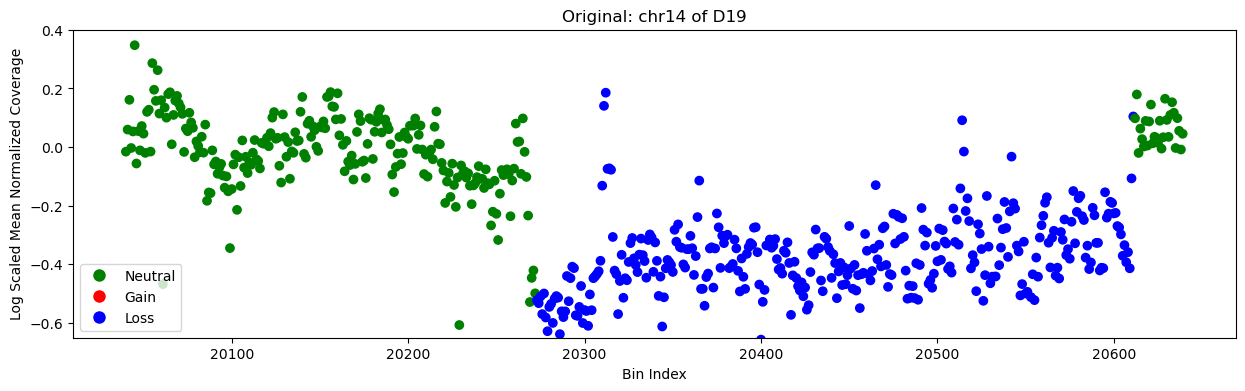

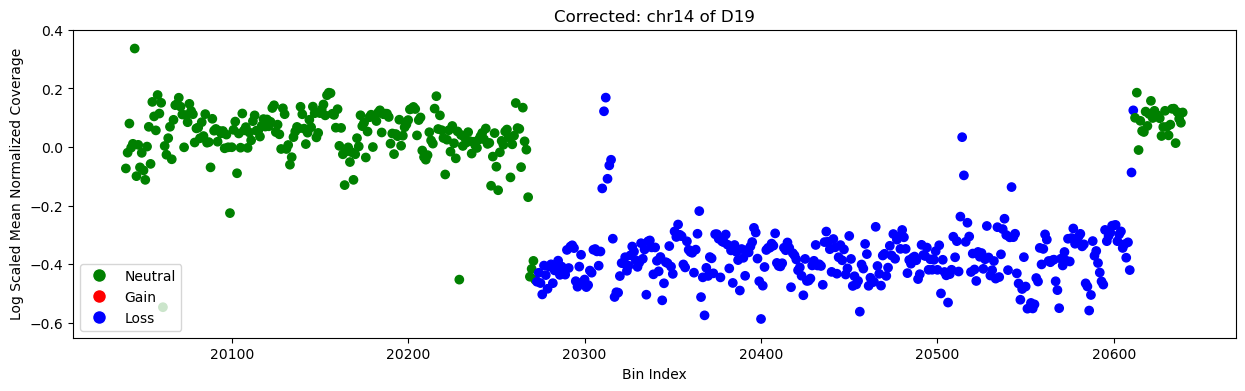

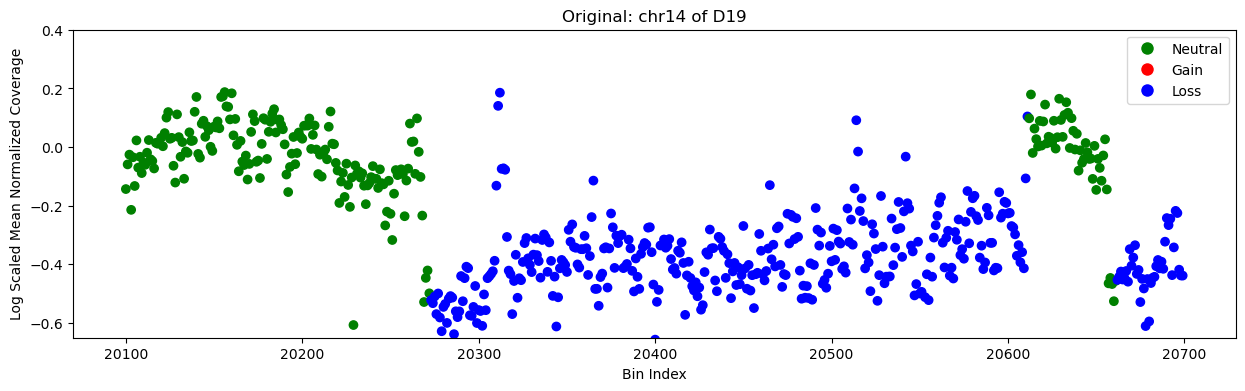

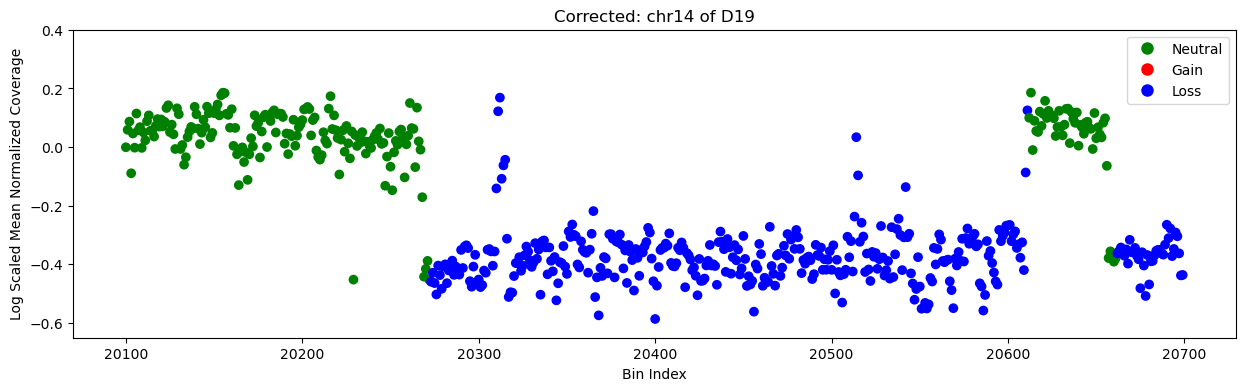

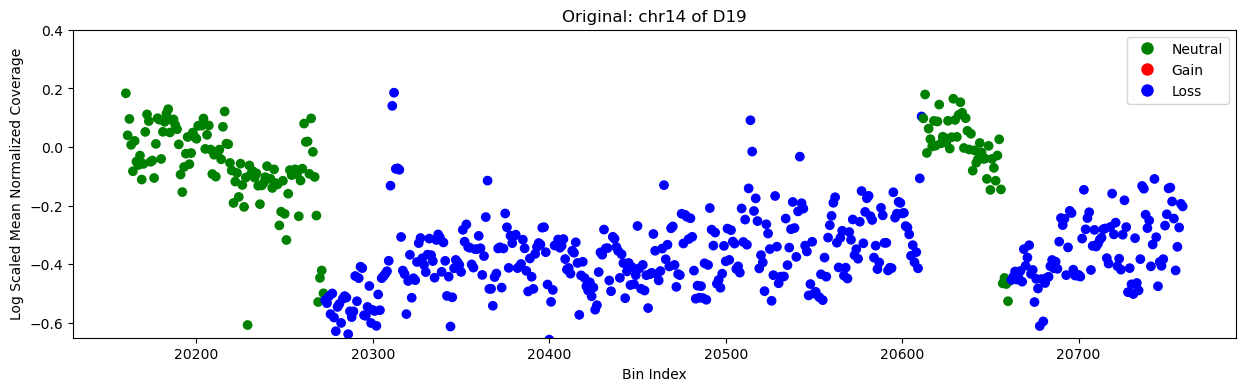

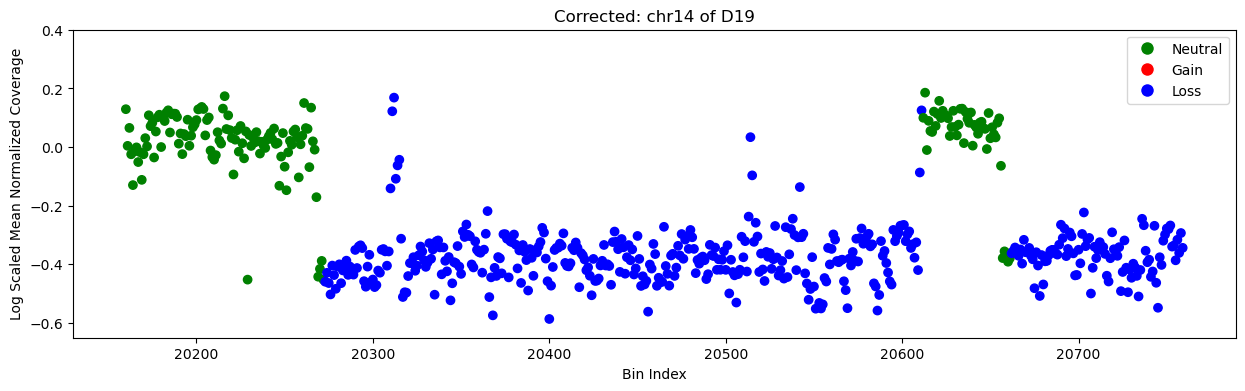

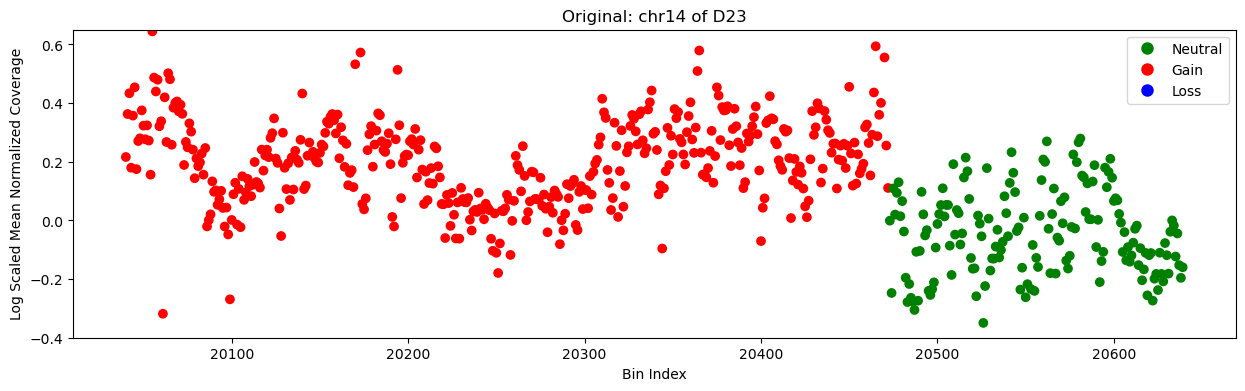

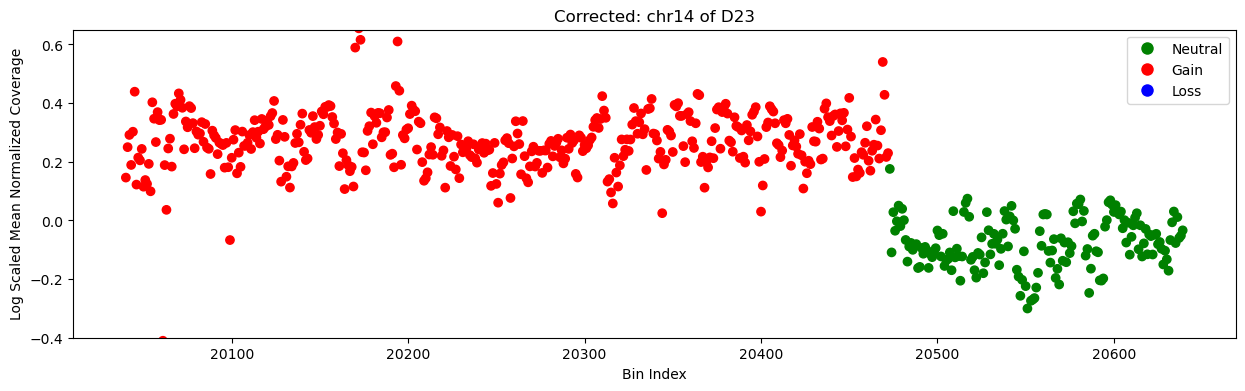

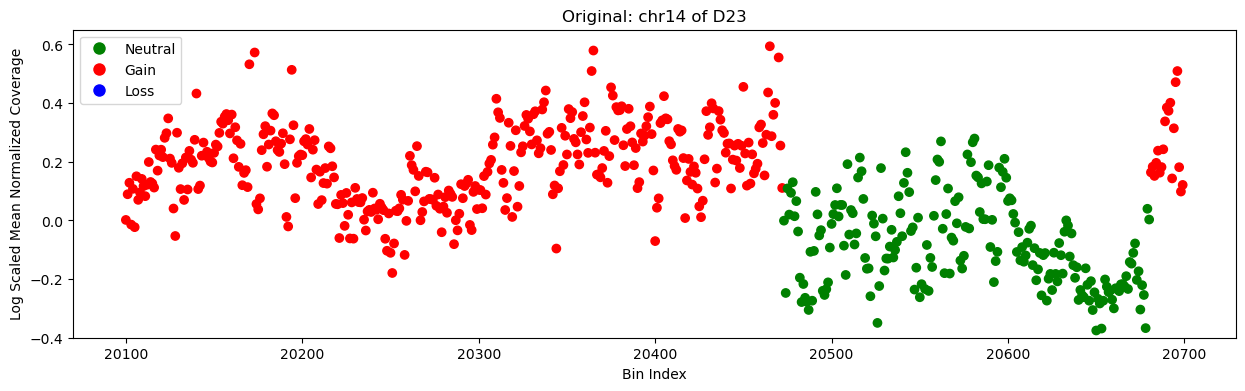

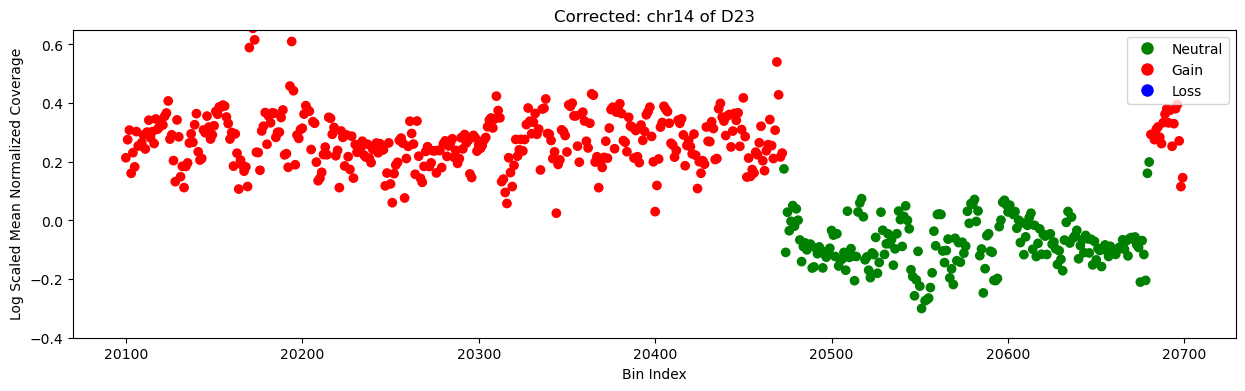

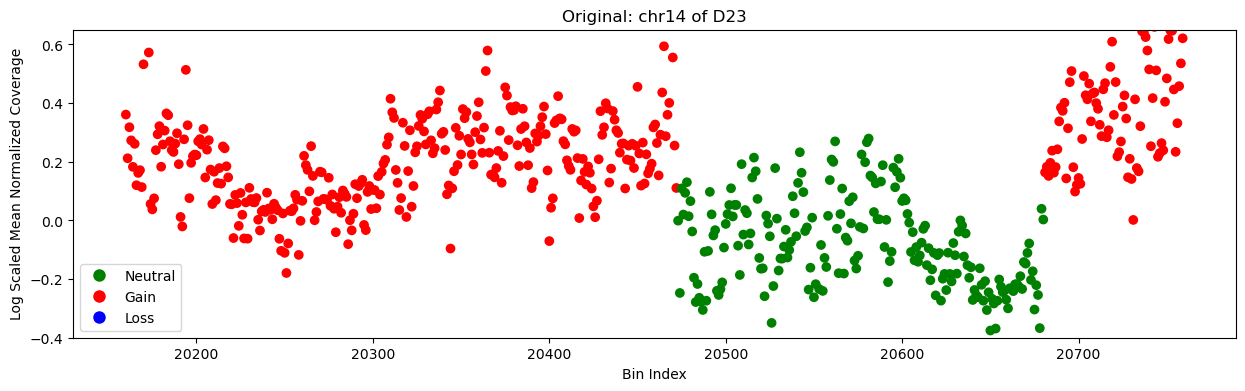

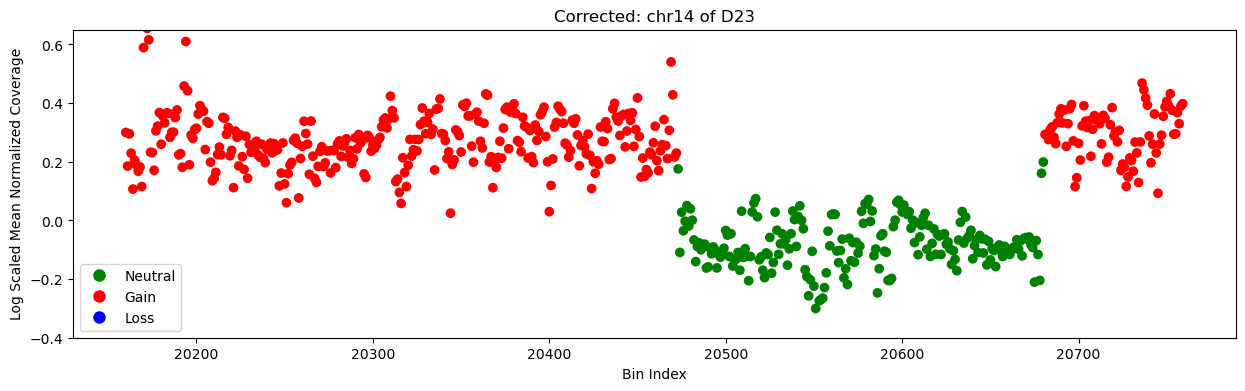

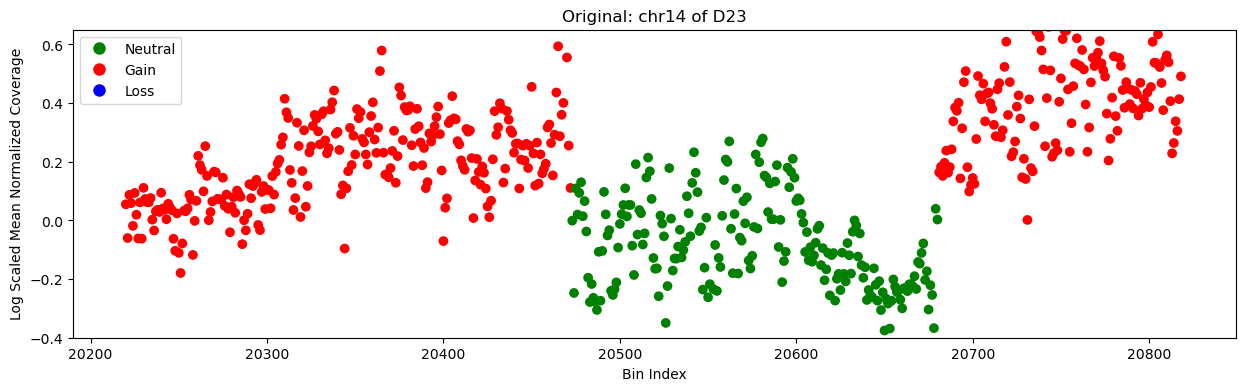

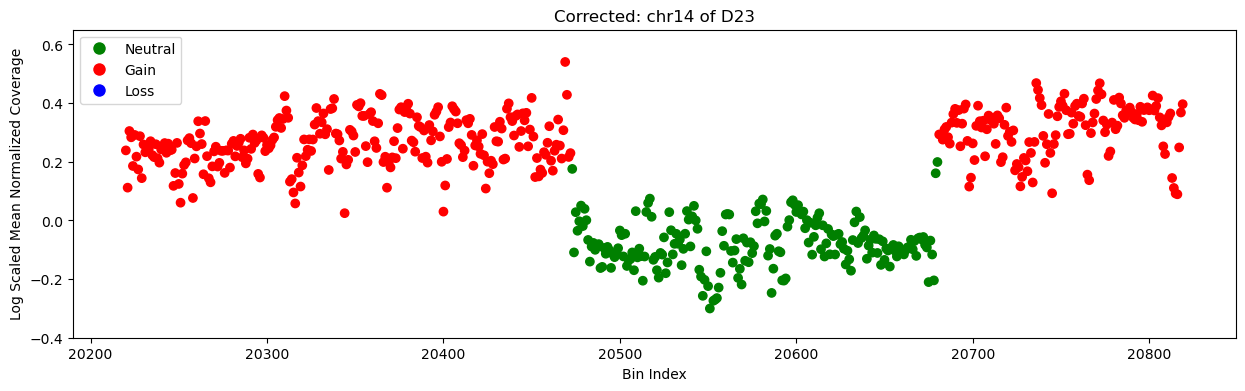

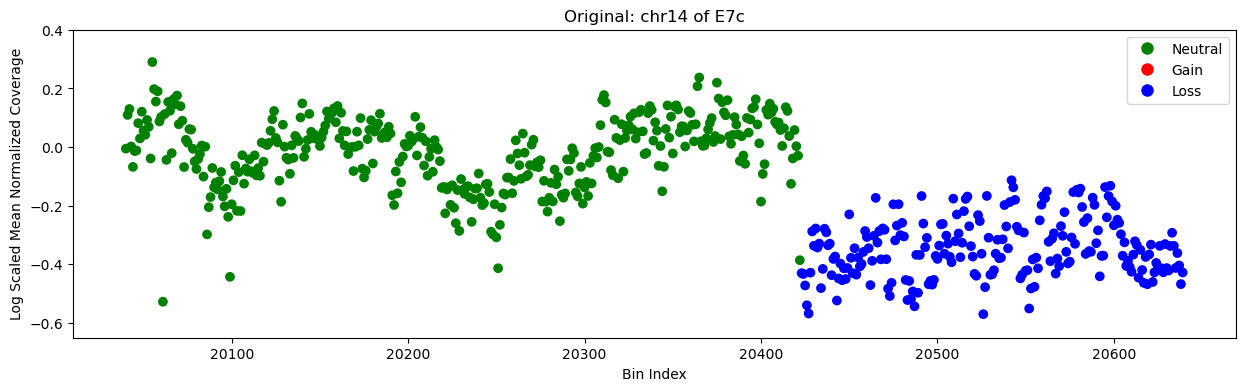

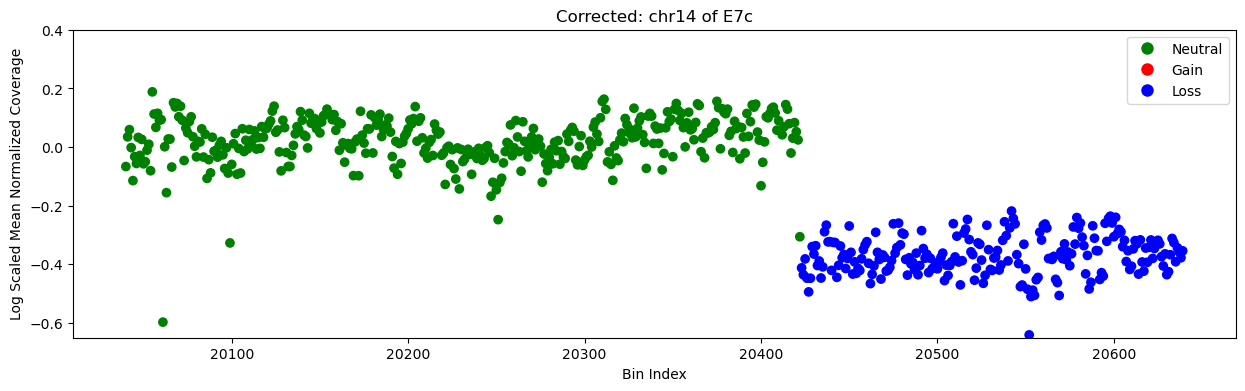

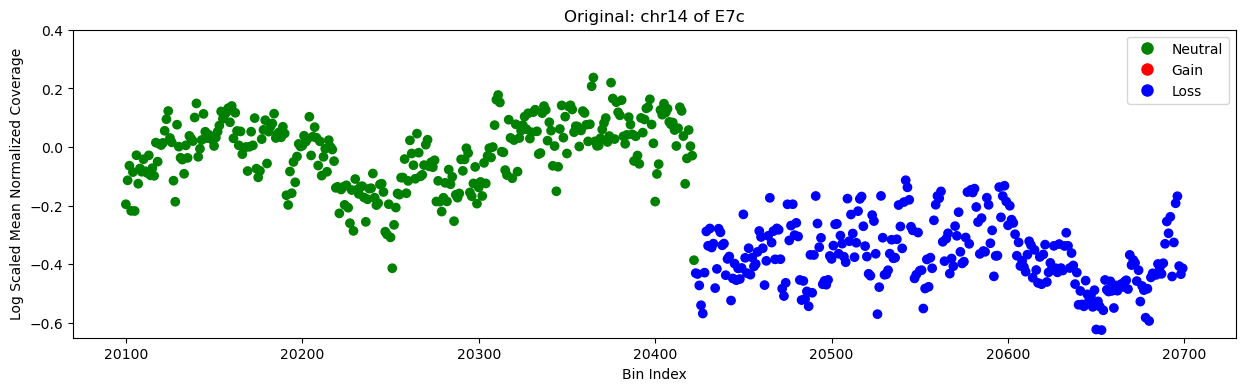

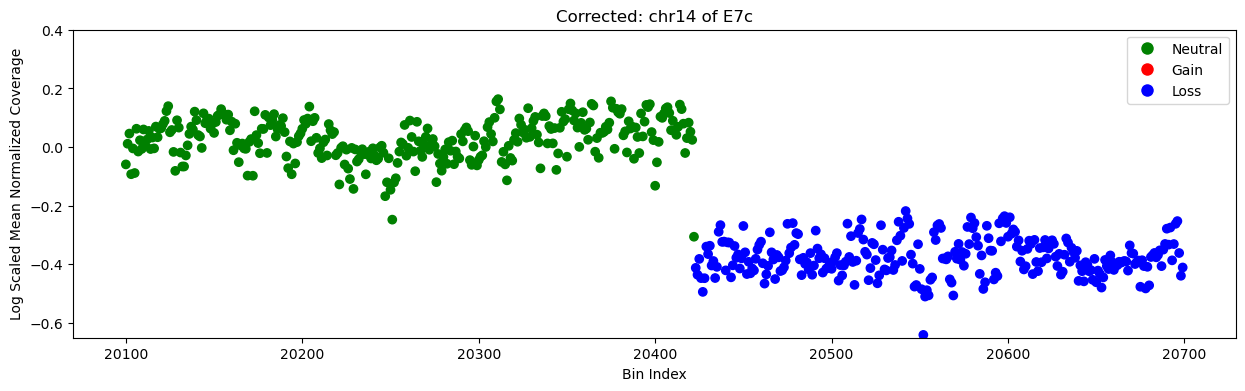

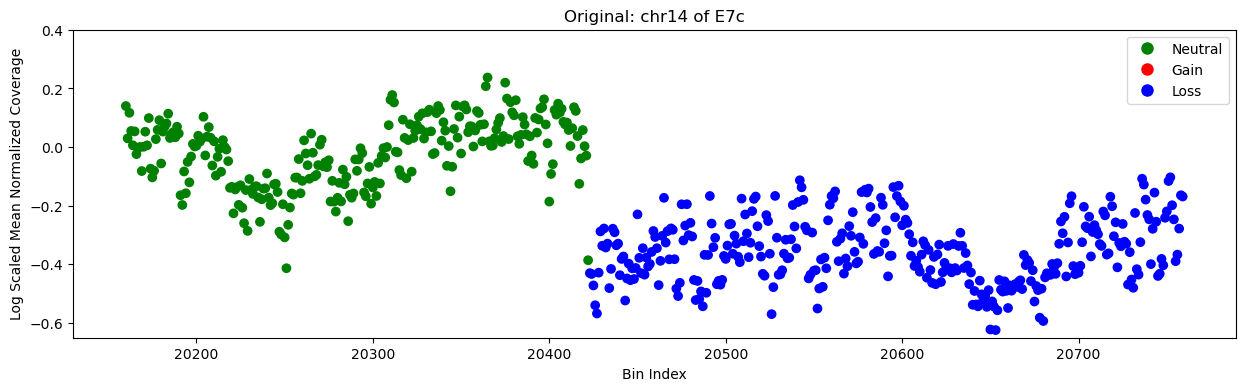

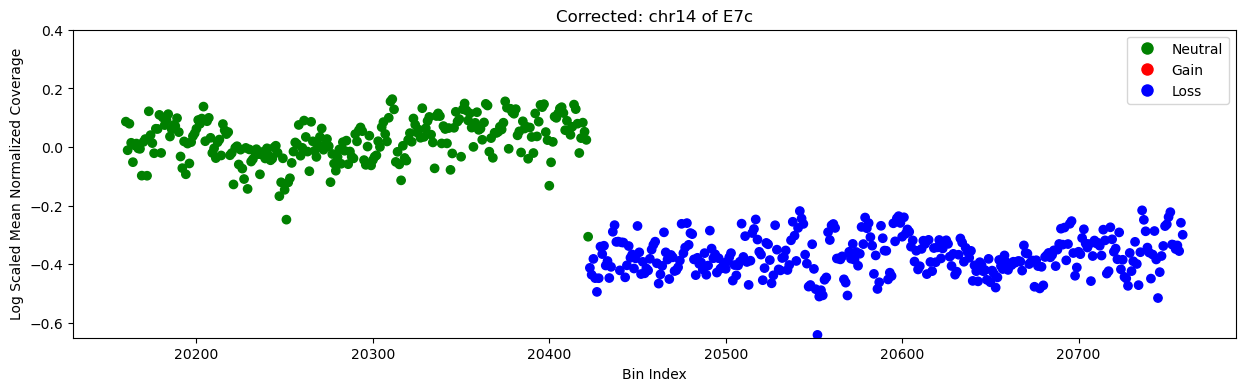

In [12]:
METHOD = 'Proposed'
root_folder = '../../Data/'
count_thr = 100
crc_region_size_thr = 300
brca_region_size_thr = 600
region_size_frac_thr = 0.2
region_step_div = 10


def identify_interesting_regions(cohort, sample_name, window_size):
    bin_CNA_labels = pd.read_csv(f'{root_folder}/Bin_Label_CNA/{cohort}/{sample_name}.csv')['CNA_Label'].values.tolist()
    bin_CNA_chrs = pd.read_csv(f'{root_folder}/Bin_Label_CNA/{cohort}/{sample_name}.csv')['Contig'].values.tolist()
    interesting_windows = []
    step_size = int(window_size/region_step_div)
    thr = int(window_size * region_size_frac_thr)
    sample = np.sum( np.load(f'{root_folder}/deepWGS_original_bin_coverage/Original/{cohort}/{sample_name}.npy'), axis=1 )
    for i in range(0, len(bin_CNA_labels)-window_size+1, step_size):
        start, end = i, i+window_size-1
        start_chr, end_chr = bin_CNA_chrs[start], bin_CNA_chrs[end]
        min_count = np.min( sample[start : end+1] )
        if start_chr == end_chr and min_count>count_thr:
            window_CNA_labels = bin_CNA_labels[start : end+1]
            neutral_no = window_CNA_labels.count('Neutral')
            gain_no = window_CNA_labels.count('Gain')
            loss_no = window_CNA_labels.count('Loss')
            nan_no = window_size - (neutral_no + gain_no + loss_no)
            if nan_no==0 and ( (neutral_no>thr and gain_no>thr) or (neutral_no>thr and loss_no>thr) ):
                interesting_windows.append([cohort, sample_name, start_chr, start, end])
    return interesting_windows

def view_interesting_regions(cohort, window_size):
    files = os.listdir(f'{root_folder}/Bin_Label_CNA/{cohort}/')
    sample_names = [file_[:-4] for file_ in files]
    interesting_region_list = []
    for sample in sample_names:
        interesting_region_list.extend( identify_interesting_regions(cohort, sample, window_size) )
    if len(interesting_region_list)>10:
        interesting_region_list = interesting_region_list[:10]
    return interesting_region_list

def get_normalized_cov(coverage):
    mean_cov = np.mean(coverage)
    norm_cov = np.log2(coverage/mean_cov + 0.0001)
    return norm_cov

def get_plot(title, bin_coverages, bin_labels, start, fileName):
    X, Y, labels = [], [], []
    for i in range(len(bin_labels)):
        X.append(start)
        Y.append(bin_coverages[i])
        labels.append(bin_labels[i])
        start += 1
    colors = {'Neutral': 'green', 'Gain': 'red', 'Loss': 'blue'}
    c = [colors[label] for label in labels]

    plt.figure(figsize=(15, 4))
    scatter = plt.scatter(X, Y, c=c, label=labels)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
               for label, color in colors.items()]
    plt.legend(handles=handles)
    plt.title(title)
    plt.xlabel('Bin Index')
    plt.ylabel('Log Scaled Mean Normalized Coverage')
    if ('Loss' in bin_labels) and ('Gain' in bin_labels):
        plt.ylim([-0.65, 0.65])
    elif 'Loss' in bin_labels:
        plt.ylim([-0.65, 0.4])
    elif 'Gain' in bin_labels:
        plt.ylim([-0.4, 0.65])
    plt.savefig(f'subfigures/{fileName}.png', dpi=300)

def plot_CNA(region, index):
    cohort, sample_name, contig, start_bin, end_bin = region[0], region[1], region[2], region[3], region[4]
    bin_CNA_labels = pd.read_csv(f'{root_folder}/Bin_Label_CNA/{cohort}/{sample_name}.csv')['CNA_Label'].values.tolist()
    original_file = f'{root_folder}/deepWGS_original_bin_coverage/Original/{cohort}/{sample_name}.npy'
    corrected_file = f'{root_folder}/deepWGS_original_bin_coverage/{METHOD}_Corrected/{cohort}/{sample_name}.npy'
    original_cov = get_normalized_cov( np.sum( np.load(original_file), axis=1 ) )[start_bin: end_bin+1]
    corrected_cov = get_normalized_cov( np.sum( np.load(corrected_file), axis=1 ) )[start_bin: end_bin+1]
    region_CNA_labels = bin_CNA_labels[start_bin: end_bin+1]
    get_plot(f'Original: {contig} of {sample_name}', original_cov, region_CNA_labels, start_bin, f'original__cancer__{index}')
    get_plot(f'Corrected: {contig} of {sample_name}', corrected_cov, region_CNA_labels, start_bin, f'corrected__cancer__{index}')
    print('..................................................................................................................')

interesting_region_list = []
interesting_region_list.extend( view_interesting_regions('CRC_gis', crc_region_size_thr) )
interesting_region_list.extend( view_interesting_regions('BRCA_gis', brca_region_size_thr) )
index = 1
for region in interesting_region_list:
    plot_CNA(region, index)
    index += 1

..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
................................................................................

C:\Users\rahmancr\AppData\Local\Temp\ipykernel_3592\2105177191.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))


..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................
..................................................................................................................


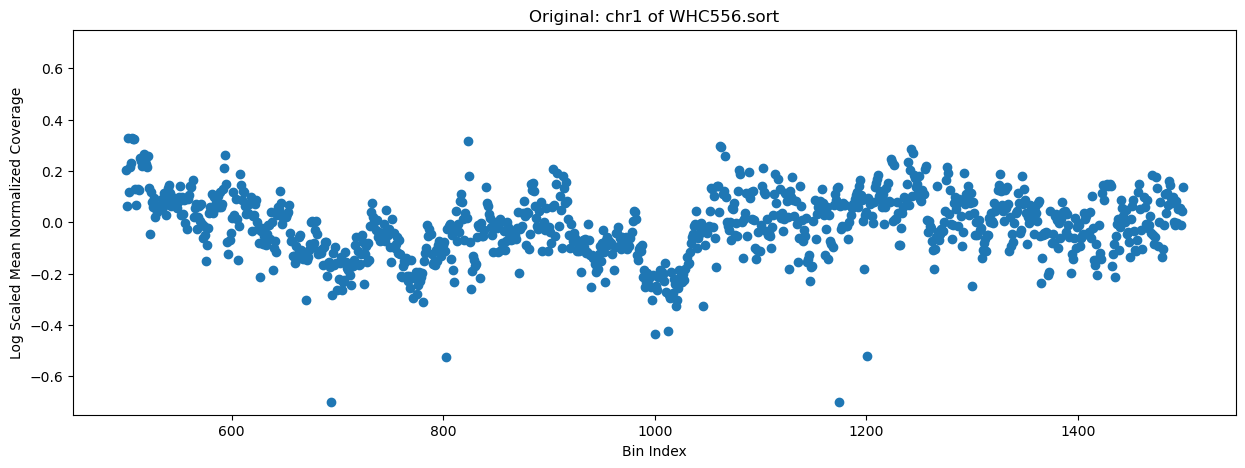

Error in callback <function flush_figures at 0x0000019A2507A5E0> (for post_execute):


KeyboardInterrupt: 

In [13]:
METHOD = 'Proposed'
root_folder = '../../Data/'
bin_locations = pd.read_csv(f'{root_folder}/Bin_Label_CNA/100Kb.csv').values.tolist()
window_size = 1000
start_offset = 500
window_size_frac_thr = 0.1
count_thr = 100

def find_region(contig, sample):
    step_size = int(window_size * window_size_frac_thr)
    start = None
    for i in range(len(bin_locations)):
        if bin_locations[i][0]==contig:
            start = i + start_offset
            break
    for i in range(start, sample.shape[0], step_size):
        min_total_count = np.min( sample[i: i+window_size] )
        if min_total_count>count_thr:
            start = i
            end = i+window_size-1
            return start, end

def identify_interesting_regions(cohort, sample_name):
    contigs = ['chr1', 'chr3', 'chr5']
    sample = np.sum( np.load(f'{root_folder}/deepWGS_original_bin_coverage/Original/{cohort}/{sample_name}.npy'), axis=1 )
    interesting_windows = []
    for contig in contigs:
        start, end = find_region(contig, sample)
        interesting_windows.append([cohort, sample_name, contig, start, end])
    return interesting_windows

def view_interesting_regions(cohort):
    files = os.listdir(f'{root_folder}/deepWGS_original_bin_coverage/Original/{cohort}/')
    sample_names = [file_[:-4] for file_ in files[:3]]
    interesting_region_list = []
    for sample in sample_names:
        interesting_region_list.extend( identify_interesting_regions(cohort, sample) )
    return interesting_region_list

def get_normalized_cov(coverage):
    mean_cov = np.mean(coverage)
    norm_cov = np.log2(coverage/mean_cov + 0.0001)
    norm_cov[norm_cov > 0.7] = 0.7
    norm_cov[norm_cov < -0.7] = -0.7
    return norm_cov

def get_plot(title, bin_coverages, start, end, fileName):
    X, Y = [], []
    for i in range(start, end+1):
        X.append(i)
        Y.append(bin_coverages[i-start])
    plt.figure(figsize=(15, 5))
    scatter = plt.scatter(X, Y)
    plt.title(title)
    plt.xlabel('Bin Index')
    plt.ylabel('Log Scaled Mean Normalized Coverage')
    plt.ylim([-0.75, 0.75])
    plt.savefig(f'subfigures/{fileName}.png', dpi=300)

def plot_CNA(region, index):
    cohort, sample_name, contig, start_bin, end_bin = region[0], region[1], region[2], region[3], region[4]
    original_file = f'{root_folder}/deepWGS_original_bin_coverage/Original/{cohort}/{sample_name}.npy'
    corrected_file = f'{root_folder}/deepWGS_original_bin_coverage/{METHOD}_Corrected/{cohort}/{sample_name}.npy'
    original_cov = get_normalized_cov( np.sum( np.load(original_file), axis=1 ) )[start_bin: end_bin+1]
    corrected_cov = get_normalized_cov( np.sum( np.load(corrected_file), axis=1 ) )[start_bin: end_bin+1]
    get_plot(f'Original: {contig} of {sample_name}', original_cov, start_bin, end_bin, f'original__healthy__{index}')
    get_plot(f'Corrected: {contig} of {sample_name}', corrected_cov, start_bin, end_bin, f'corrected__healthy__{index}')
    print('..................................................................................................................')

interesting_region_list = []
interesting_region_list.extend( view_interesting_regions('healthy_c2i') )
interesting_region_list.extend( view_interesting_regions('healthy_invitro') )
index = 1
for region in interesting_region_list:
    plot_CNA(region, index)
    index += 1

WHC556.sort


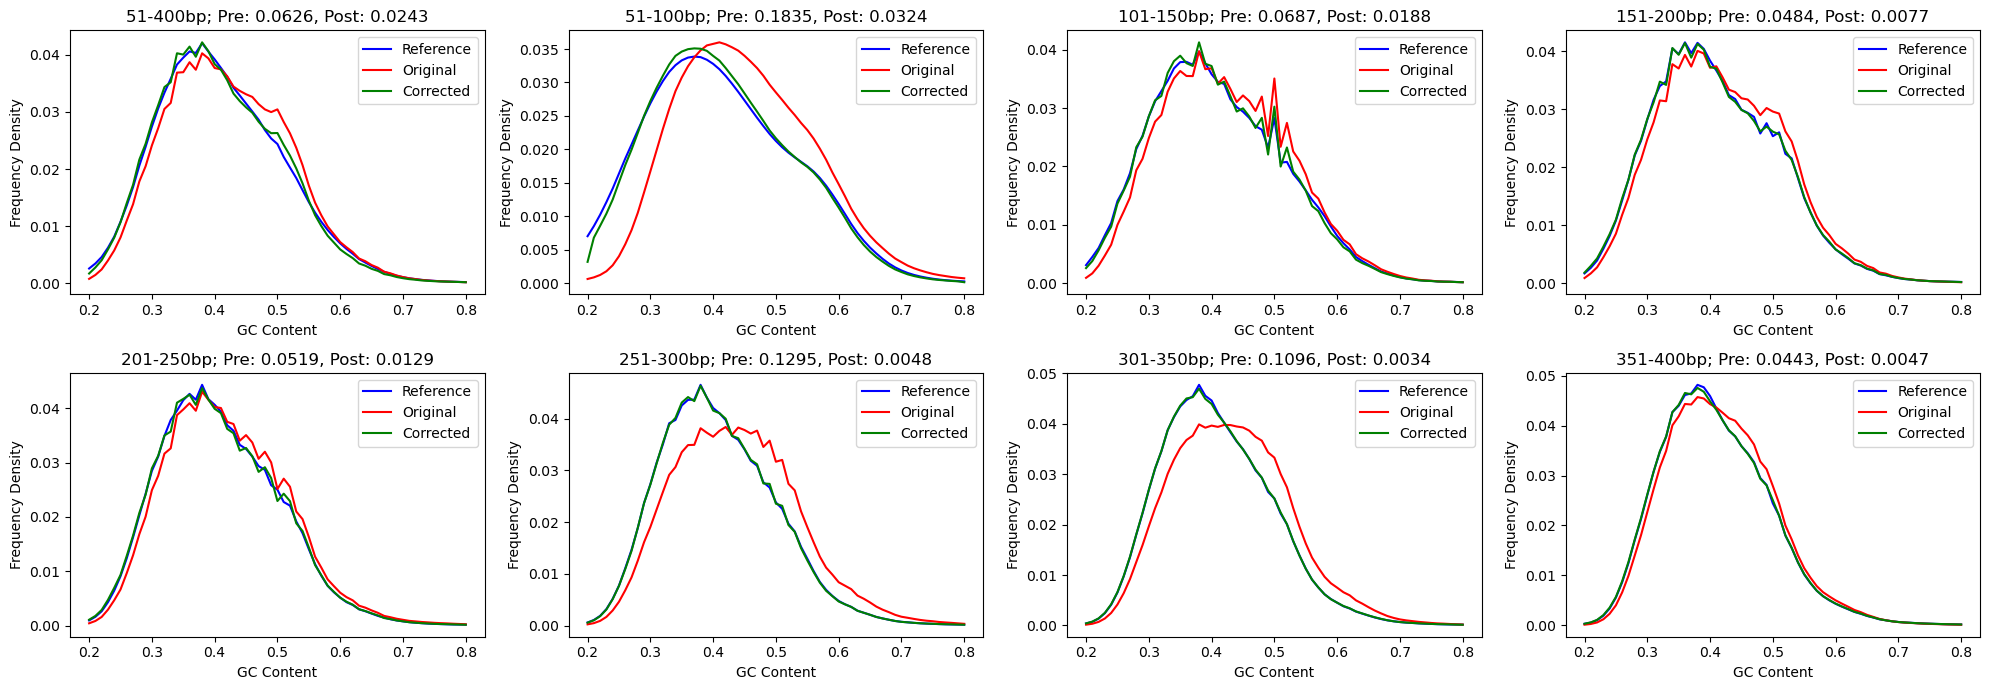

In [5]:
METHOD = 'Proposed'
root_folder = '../../Data/'
original_GC_array_dic, correct_GC_array_dic = {}, {}
cohorts = ['BRCA_gis', 'CRC_gis', 'healthy_c2i', 'healthy_invitro']


def interpolate_zero_elements(array):
    first_non_zero_index = np.argmax(array != 0)
    last_non_zero_index = len(array) - 1 - np.argmax(array[::-1] != 0)
    inner_array = array[first_non_zero_index:last_non_zero_index + 1]
    non_zero_indices = np.nonzero(inner_array)[0]
    zero_indices = np.where(inner_array == 0)[0]
    inner_array[zero_indices] = np.interp(zero_indices, non_zero_indices, inner_array[non_zero_indices])
    array[first_non_zero_index:last_non_zero_index + 1] = inner_array
    return array

def process_length_level(len_sample):
    processed_sample = np.zeros( len_sample.shape )
    for i in range(len_sample.shape[0]):
        processed_sample[i, :] = interpolate_zero_elements(len_sample[i, :])
    return processed_sample

def load_folder(folder, sample_type):
    global original_GC_array_dic, correct_GC_array_dic
    for file_ in os.listdir(folder):
        if file_.endswith('.npy')==True:
            GC_array = np.load(folder + '/' + file_)
            if sample_type==0:
                original_GC_array_dic[file_[:-4]] = process_length_level(GC_array)
            elif sample_type==1:
                correct_GC_array_dic[file_[:-4]] = process_length_level(GC_array)

original_folder = f'{root_folder}/deepWGS_original_length_gc/Original/'
for cohort in cohorts:
    load_folder(f'{original_folder}/{cohort}', 0)
                     
correct_folder = f'{root_folder}/deepWGS_original_length_gc/{METHOD}_Corrected/'
for cohort in cohorts:
    load_folder(f'{correct_folder}/{cohort}', 1)

ref_GC_array = np.load(f'{root_folder}/ref_genome_GC.npy')
ref_len_GC_array = process_length_level(ref_GC_array)



def derive_Y(sample, start_len, end_len):
    len_inds = [(i-51) for i in range(start_len, end_len+1)]
    Y = np.sum(sample[len_inds, 20:81], axis=0)
    Y = Y / np.sum(Y)
    return Y


def plot_GC_curve(sample):
    global correct_GC_array_dic, ref_len_GC_array, ref_correct_JS_dic
    print(sample)
    len_groups = [[51, 400], [51, 100], [101, 150], [151, 200], [201, 250], [251, 300], [301, 350], [351, 400]]
    X = [(i/100.0) for i in range(20, 81)]
    fig, axes = plt.subplots(2, 4, figsize=(20, 7))
    i = 0
    
    for len_group in len_groups:
        ref_Y = derive_Y(ref_len_GC_array, len_group[0], len_group[1])
        original_Y = derive_Y(original_GC_array_dic[sample], len_group[0], len_group[1])
        correct_Y = derive_Y(correct_GC_array_dic[sample], len_group[0], len_group[1])
        ref_original_diff = round(jensenshannon(ref_Y, original_Y, base=2), 4)
        ref_correct_diff = round(jensenshannon(ref_Y, correct_Y, base=2), 4)
        key = f'{sample}: {len_group[0]}-{len_group[1]}'
        row = i // 4
        col = i % 4 
        ax = axes[row, col]
        ax.plot(X, ref_Y, label='Reference', color='blue')
        ax.plot(X, original_Y, label='Original', color='red')
        ax.plot(X, correct_Y, label='Corrected', color='Green')
        ax.set_title(f'{len_group[0]}-{len_group[1]}bp; Pre: {ref_original_diff}, Post: {ref_correct_diff}')
        ax.set_xlabel('GC Content')
        ax.set_ylabel('Frequency Density')
        ax.legend()
        i += 1
    plt.tight_layout()
    plt.savefig('subfigures/JS_divergence.png', dpi=300)

plot_cnt = 1
for sample in original_GC_array_dic.keys():
    if 'WHC' in sample:
        plot_GC_curve(sample)
        break